In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as scs
import scipy
from sklearn.linear_model import LogisticRegression, LinearRegression
import itertools

columns = ['Name', 'Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism', 'Score Date']
personality_dimensions = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']
df = pd.DataFrame(columns=columns)
df_g67ds = pd.DataFrame(columns=columns)

In [56]:
def convert_to_ocean_score(score):
#     converts the open psychometric score to an OCEAN format
#     Only real difference is Emotional Stability is the inverse of Neuroticism in OCEAN

#     open_psychometric (score):
#         0 Extraversion
#         1 Emotional Stability
#         2 Agreeableness
#         3 Conscientiousness
#         4 Intellect/Imagination
    
#     OCEAN (ocean_score):
#         0 Openness
#         1 Conscientiousness
#         2 Extraversion
#         3 Agreeableness
#         4 Neuroticism

    O = score[4]
    C = score[3]
    E = score[0]
    A = score[2]
    N = 100 - score[1]

    ocean_score = [O, C, E, A, N]
    
    return ocean_score

In [57]:
def create_row(name, date, score):
    ocean_score = convert_to_ocean_score(score)
    row = []
    row.append(name)
    for s in ocean_score:
        row.append(s)
    row.append(date)
    return row

In [58]:
def select_by_name(names, df):
#     selects the data rows from the df based on a list of names
#     names = list of strings
    result = pd.DataFrame([], columns=columns)
    for name in names:
        result = pd.concat([result, df.loc[df['Name'] == name]])
    return result

In [59]:
personality_scores = [
    ['Jason Li', 93, 62, 13, 89, 19, '4/14/18'],
    ['Bradley Li', 34, 52, 45, 51, 38, '4/14/18'],
    ['Kellian Valenti', 59, 26, 11, 17, 19, '4/14/18'],
    create_row('Gansin Li', '4/16/18', [19, 66, 17, 26, 18]),
    create_row('Janie Kashiwa-Li', '4/16/18', [45, 5, 87, 97, 91]),
]



for idx, person in enumerate(personality_scores):
    df.loc[idx] = person

In [75]:
g67ds_personality_scores = [
    ['Jason Li', 93, 62, 13, 89, 19, '4/14/18'],
    create_row('Phil Geurin', '5/11/18', [98, 84, 80, 31, 96]),
    create_row('Ashley Huddleston', '5/11/18', [90, 74, 67, 31, 52]),
    create_row('Dylan Harper', '5/11/18', [11, 22, 80, 12, 80]),
    create_row('Nguyen Ngo', '5/13/18', [54, 95, 67, 72, 52]),
    create_row('Brian McGarry', '5/13/18', [37, 96, 21, 5, 95]),
    create_row('Ryan Loong', '5/13/18', [22, 4, 83, 36, 1]),
]

for idx, person in enumerate(g67ds_personality_scores):
    df_g67ds.loc[idx] = person

In [ ]:
brian = select_by_name(['Brian McGarry'], df_g67ds)
ryan = select_by_name(['Ryan Loong'], df_g67ds)

In [61]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

    
def plot_radar_chart(df):
    # number of variable
    categories=personality_dimensions
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=df[personality_dimensions].values.flatten().tolist()
    values += values[:1]
    values

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=11)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30,40,50,60,70,80,90], ["10","20","30",'40','50','60','70','80','90'], color="grey", size=8)
    plt.ylim(0,100)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    



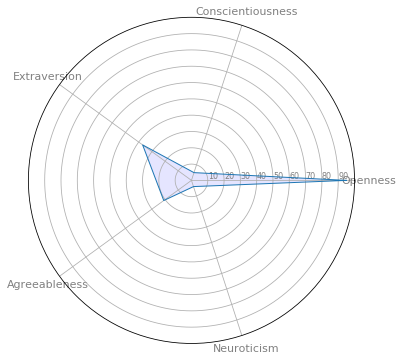

In [82]:
fig, axs = plt.subplots(len(df_g67ds), 2, figsize=(10, 6))
axs.flatten()[1] = plot_radar_chart(brian)

# 
# for i, ax in enumerate(axs.flatten()):  
#     plot_radar_chart(df.iloc[i])
    
# for idx, person in df.iterrows():
    
#     plot_radar_chart(person)

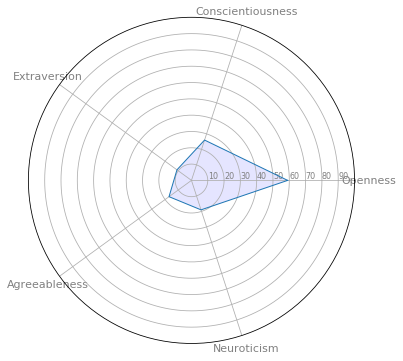

In [74]:
fig, axs = plt.subplots(len(df), 2, figsize=(10, 6))

axs.flatten()[1] = plot_radar_chart(select_by_name(['Kellian Valenti'], df))

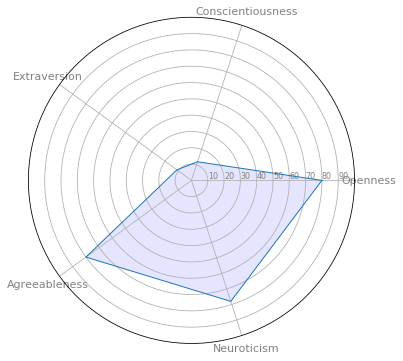

In [69]:
fig, axs = plt.subplots(len(df_g67ds), 2, figsize=(10, 6))
# axs.flatten()[0] = plot_radar_chart(df.iloc[0])
# axs.flatten()[1] = plot_radar_chart(df_g67ds.iloc[0])
# axs.flatten()[1] = plot_radar_chart(df_g67ds.iloc[1])
# axs.flatten()[1] = plot_radar_chart(df_g67ds.iloc[2])
axs.flatten()[1] = plot_radar_chart(df_g67ds.iloc[3])

In [606]:
df

,Name,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Score Date
0,Jason Li,93,62,13,89,19,4/14/18
1,Bradley Li,34,52,45,51,38,4/14/18
2,Kellian Valenti,59,26,11,17,19,4/14/18
3,Gansin Li,18,26,19,17,34,4/16/18
4,Janie Kashiwa-Li,91,97,45,87,95,4/16/18


In [478]:
from scipy.spatial.distance import euclidean

def calc_personality_distance(person1, person2):
    personality1 = person1[personality_dimensions]
    personality2 = person2[personality_dimensions]
    
    return euclidean(personality1, personality2)

In [480]:
df.iloc[1:,:]

,Name,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Score Date
1,Bradley Li,34,52,45,51,38,4/14/18
2,Kellian Valenti,59,26,11,17,19,4/14/18
3,Gansin Li,18,26,19,17,34,4/16/18
4,Janie Kashiwa-Li,91,97,45,87,95,4/16/18


In [481]:
def most_similar_person(person, df):
#     returns the person with the most similar personality

    similarity_scores = []
    
#   drops the current person from the dataframe
    persons_name = person['Name'].item()
    df = df.drop(df.index[df['Name'] == persons_name])
    
    for index, row in df.iterrows():
        similarity_scores.append(
            calc_personality_distance(person, select_by_name([row['Name']], df))
        )
        
    index = similarity_scores.index(min(similarity_scores))
    
    return df.iloc[index]

def most_dissimilar_person(person, df):
#     returns the person with the most dissimilar personality

    dissimilarity_scores = []
    
#   drops the current person from the dataframe
    persons_name = person['Name'].item()
    df = df.drop(df.index[df['Name'] == persons_name])
    
    for index, row in df.iterrows():
        dissimilarity_scores.append(
            calc_personality_distance(person, select_by_name([row['Name']], df))
        )
        
    index = dissimilarity_scores.index(max(dissimilarity_scores))
    
    return df.iloc[index]


In [482]:
df

,Name,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Score Date
0,Jason Li,93,62,13,89,19,4/14/18
1,Bradley Li,34,52,45,51,38,4/14/18
2,Kellian Valenti,59,26,11,17,19,4/14/18
3,Gansin Li,18,26,19,17,34,4/16/18
4,Janie Kashiwa-Li,91,97,45,87,95,4/16/18


In [486]:
most_similar_person(select_by_name(['Jason Li'], df), df)

Name                 Bradley Li
Openness                     34
Conscientiousness            52
Extraversion                 45
Agreeableness                51
Neuroticism                  38
Score Date              4/14/18
Name: 1, dtype: object

In [487]:
most_dissimilar_person(select_by_name(['Jason Li'], df), df)

Name                 Gansin Li
Openness                    18
Conscientiousness           26
Extraversion                19
Agreeableness               17
Neuroticism                 34
Score Date             4/16/18
Name: 3, dtype: object

In [485]:
df

,Name,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Score Date
0,Jason Li,93,62,13,89,19,4/14/18
1,Bradley Li,34,52,45,51,38,4/14/18
2,Kellian Valenti,59,26,11,17,19,4/14/18
3,Gansin Li,18,26,19,17,34,4/16/18
4,Janie Kashiwa-Li,91,97,45,87,95,4/16/18
